- 股價預測
- https://ithelp.ithome.com.tw/users/20152199/ironman/5595

In [32]:
import requests
url = "https://goodinfo.tw/tw/StockBzPerformance.asp?STOCK_ID=2330"
res = requests.get(url)
res.text

'<meta http-equiv="Content-Type" content="text/html; charset=utf-8">è«\x8bå\x8b¿é\x80\x8fé\x81\x8eç¶²ç«\x99å\x85§å®¹ä¸\x8bè¼\x89è»\x9fé«\x94æ\x9f¥è©¢æ\x9c¬ç¶²ç«\x99'

Response 常用的屬性及說明
- url：資源的 URL 位址。
- content：回應訊息的內容 ( bytes )。
- text：回應訊息的內容字串 ( str )。
- raw：原始回應訊息串流 ( bytes )。
- status_code：回應的狀態 ( int )。
- encoding：回應訊息的編碼。
- headers：回應訊息的標頭 ( dict )。
- cookies：回應訊息的 cookies ( dict )。
- history：請求歷史 ( list )。
- json()：將回應訊息進行 JSON 解碼後回傳 ( dict )。
- rasise_for_status()：檢查是否有例外發生，如果有就拋出例外。

In [33]:
res.encoding = "utf-8"
res.text

'<meta http-equiv="Content-Type" content="text/html; charset=utf-8">請勿透過網站內容下載軟體查詢本網站'

### 反爬蟲機制(設定使用者代理)
- F12> Network(Ctrl+R) >Header> user-agent

In [34]:
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
}
res = requests.get(url,headers = headers)
res.encoding = "utf-8"
res.text


'\r\n<!doctype html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html lang="zh-Hant">\r\n<head>\r\n\r\n<meta charset="UTF-8">\r\n<meta name="viewport" content="width=device-width">\r\n<meta name="description" content="(2330) 台積電歷年財報評比,股票成交價格,成交量,獲利能力(如:營業收入,淨利,營業毛利率,淨利率),股東權益報酬率ROE,資產報酬率ROA,每股盈餘EPS,每股淨值BPS,現金股利,股票股利,殖利率 等交易資料統計">\r\n<title>(2330) 台積電歷年經營績效統計 - 合併財報 - Goodinfo!台灣股市資訊網</title>\r\n\r\n<link rel="canonical" href="https://goodinfo.tw/tw/StockBzPerformance.asp?STOCK_ID=2330&RPT_CAT=M%5FYEAR"/>\r\n<link rel="icon" href="image/Goodinfo.ico">\r\n<link rel="stylesheet" type="text/css" href="../Library/css/Standard.css?45065.8419907407"/>\r\n<link rel="stylesheet" type="text/css" href="../Library/css/Public.css?45066.8097222222"/>\r\n\r\n<script type="text/javascript" charset="utf-8" src="Lib.js/Initial.asp"></script>\r\n<script type="text/javascript" charset="utf-8" src="Lib.js/Utility.asp"></script>\r\n<script ty

### 針對特定表格元素去爬取
- 選擇要的爬取的數據，如"收盤"，往上滑可以看到 div='#txtFinDetailData'

In [35]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text,"lxml")
data = soup.select_one("#txtFinDetailData")
data

<div id="txtFinDetailData"><div class="r0_10 box_shadow" style="position:relative;width:811px;"><div id="divDetail" style="overflow-x:auto;overflow-y:hidden;border:0;"><table class="b1 p4_2 r0_10 row_bg_2n row_mouse_over" id="tblDetail" style="width:100%;font-size:10pt;line-height:17px;"><tr class="bg_h2" style="font-weight:bold;text-align:center;"><th rowspan="2"><nobr>年度</nobr></th><th rowspan="2"><nobr>股本<br/>(億)</nobr></th><th rowspan="2"><nobr>財報<br/>評分</nobr></th><th colspan="4"><nobr>年度股價(元)</nobr></th><th colspan="5"><nobr>獲利金額(億)</nobr></th><th colspan="4"><nobr>獲利率(%)</nobr></th><th rowspan="2"><nobr>ROE<br/>(%)</nobr></th><th rowspan="2"><nobr>ROA<br/>(%)</nobr></th><th colspan="2"><nobr>EPS(元)</nobr></th><th rowspan="2"><nobr>BPS<br/>(元)</nobr></th></tr><tr class="bg_h2" style="font-weight:bold;text-align:center;"><th><nobr>收盤</nobr></th><th title="年度平均收盤價"><nobr>平均</nobr></th><th><nobr>漲跌</nobr></th><th><nobr>漲跌<br/>(%)</nobr></th><th><nobr>營業<br/>收入</nobr></th><th><nobr>營

## 排版美化設定

In [36]:
import pandas as pd
dfs = pd.read_html(data.prettify())
df = dfs[0]
df.head()

年度 股本  (億) 財報  評分 年度股價(元)                      獲利金額(億)                \
     年度 股本  (億) 財報  評分      收盤   平均      漲跌 漲跌  (%)  營業  收入 營業  毛利 營業  利益   
0  23Q1    2593     89     558  517  +109.5   +24.4    5086   2865   2312   
1  2022    2593     89   448.5  516  -166.5   -27.1   22639  13484  11213   
2  2021    2593     87     615  598     +85     +16   15874   8195   6500   
3  2020    2593     89     530  379    +199   +60.1   13393   7111   5668   
4  2019    2593     89     331  262  +105.5   +46.8   10700   4927   3727   

   ...        獲利率(%)                         ROE  (%)    ROA  (%)  EPS(元)  \
   ... 稅後  淨利 營業  毛利 營業  利益 業外  損益 稅後  淨利    ROE  (%)    ROA  (%) 稅後  EPS   
0  ...   2070   56.3   45.5   2.56   40.7  27.3  (年估)  16.5  (年估)    7.98   
1  ...  10165   59.6   49.5   1.01   44.9        39.6        23.4    39.2   
2  ...   5965   51.6   40.9   0.83   37.6        29.7        18.4   23.01   
3  ...   5179   53.1   42.3   1.34   38.7        29.8        20.6   19.97   
4  ...   3453     46   34.8    1.6   32.3        20.9        15.9   13.32   

          BPS  (元)  
  年增  (元) BPS  (元)  
0   +0.16    118.7  
1  +16.19    113.6  
2   +3.04    83.62  
3   +6.65    71.33  
4   -0.22    62.53  

[5 rows x 21 columns]

- 可看出Dataframe結構是多個index，因此，要按index取出值

In [37]:
df.columns

MultiIndex([(      '年度',       '年度'),
            ( '股本  (億)',  '股本  (億)'),
            (  '財報  評分',   '財報  評分'),
            ( '年度股價(元)',       '收盤'),
            ( '年度股價(元)',       '平均'),
            ( '年度股價(元)',       '漲跌'),
            ( '年度股價(元)',  '漲跌  (%)'),
            ( '獲利金額(億)',   '營業  收入'),
            ( '獲利金額(億)',   '營業  毛利'),
            ( '獲利金額(億)',   '營業  利益'),
            ( '獲利金額(億)',   '業外  損益'),
            ( '獲利金額(億)',   '稅後  淨利'),
            (  '獲利率(%)',   '營業  毛利'),
            (  '獲利率(%)',   '營業  利益'),
            (  '獲利率(%)',   '業外  損益'),
            (  '獲利率(%)',   '稅後  淨利'),
            ('ROE  (%)', 'ROE  (%)'),
            ('ROA  (%)', 'ROA  (%)'),
            (  'EPS(元)',  '稅後  EPS'),
            (  'EPS(元)',  '年增  (元)'),
            ('BPS  (元)', 'BPS  (元)')],
           )

In [38]:
# 排除多於字串，只留下浮點數和整數
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False
def isint(num):
    try:
        int(num)
        return True
    except ValueError:
        return False

In [39]:
list_close = [float(df['年度股價(元)']['收盤'][i]) for i in range(len(df['年度股價(元)']['收盤'])) if isfloat(df['年度股價(元)']['收盤'][i])]
list_int = [int(df['年度']['年度'][i]) for i in range(len(df['年度']['年度'])) if isint(df['年度']['年度'][i])]

In [40]:
# list_close

In [41]:
print(len(list_close))
print(len(list_int))

30
32


- 取出的2022~ 1994年的收盤價

In [75]:
list_year = list_int[0:30]
# list_year

In [76]:
import pandas as pd
data_input = pd.DataFrame({'year':list_year, 'close_price':list_close})
data_input = data_input.sort_values(by='year').reset_index(drop=True)      #按年度升冪排序
data_input.index = data_input.year      #加入年度為index

In [77]:
data_input

,year,close_price
year,,
1993,1993,157.0
1994,1994,85.0
1995,1995,56.5
1996,1996,112.0
1997,1997,71.0
1998,1998,167.0
1999,1999,78.5
2000,2000,87.5
2001,2001,42.6


<AxesSubplot:xlabel='year'>

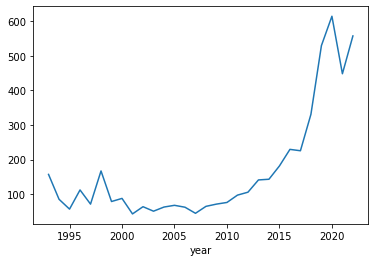

In [78]:
data_input.close_price.plot()